In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
strat_hists = {}
num_rounds=200
base_path = "C:/Users/henry/Documents/University/Year_3_Part_2/FederatedLearning/flower/baselines/flwr_baselines/publications"
all_strats = ['fedexp']
strategy_suffixes = {
    'fedexp': "_E=20_R=200_ηl=0.1_ε=0_evaluateRounds=20_run_num=",
    'fedavg': "_B=50_ηl=0.316_ηg=1_E=20_R=10_run_num="
}

In [21]:
for strategy in all_strats:
    strat_hists[strategy] = []
    run_num = 1
    file_path = Path(f"{base_path}/{strategy}_synthetic/docs/results/hist{strategy_suffixes[strategy]}{run_num}.npy")
    while file_path.exists():
        strat_hists[strategy].append(np.load(file_path, allow_pickle=True))
        run_num += 1
        file_path = Path(f"{base_path}/{strategy}_synthetic/docs/results/hist{strategy_suffixes[strategy]}{run_num}.npy")

In [22]:
stratAllAccuracies = {}
for strat in all_strats:
    stratAllAccuracies[strat] = np.zeros(shape=(len(strat_hists[strat]), num_rounds + 1))
    for i, hist in enumerate(strat_hists[strat]):
        accuracies = np.array([acc for (_, acc) in hist.item().losses_centralized])
        stratAllAccuracies[strat][i] = accuracies

In [23]:
stratAverageAccuracies = { strat: np.mean(stratAllAccuracies[strat], axis=0) for strat in all_strats}
stratStdAccuracies = { strat: np.std(stratAllAccuracies[strat], axis=0, ddof=1) for strat in all_strats}

Text(0.5, 1.0, 'Mean Squared Errors of strategies against round')

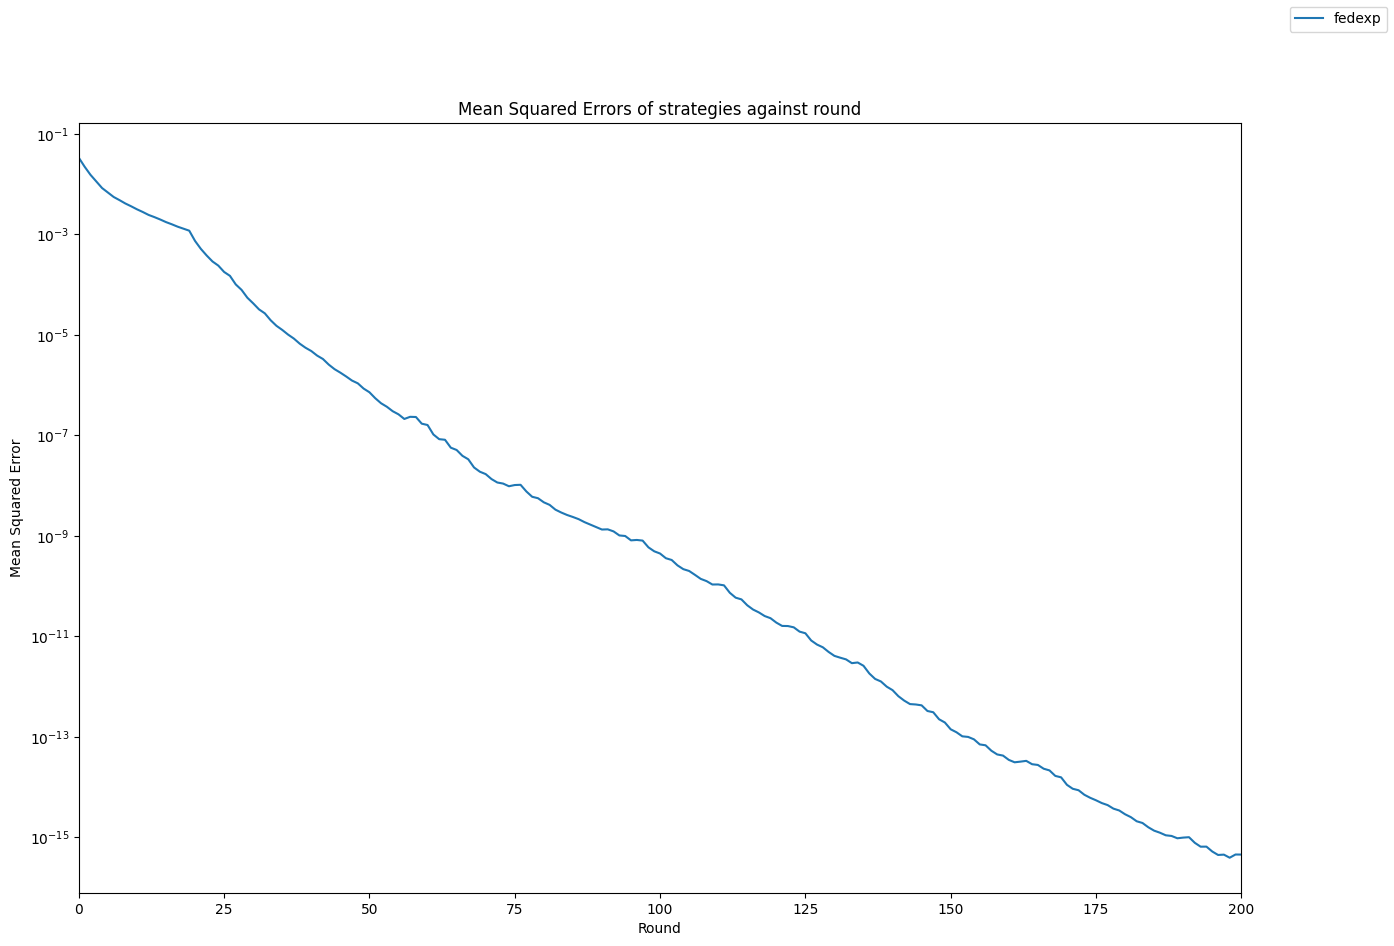

In [24]:
fig, ax = plt.subplots(figsize=(15,10))


for strat in all_strats:
    ax.plot(stratAverageAccuracies[strat], label=strat)
    ax.fill_between(np.arange(num_rounds + 1), stratAverageAccuracies[strat] - stratStdAccuracies[strat], stratAverageAccuracies[strat] + stratStdAccuracies[strat], alpha=0.3)

ax.set_xbound(0, num_rounds)
fig.legend()
ax.set_ylabel("Mean Squared Error")
ax.set_yscale('log')
ax.set_xlabel("Round")
ax.set_title("Mean Squared Errors of strategies against round")